In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import spacy 
from itertools import combinations
import re

In [115]:
df_clean = pd.read_csv('ai_human_clean.csv') 

df_clean['label_text'] = df_clean['label_encoded'].map({
    0: 'Human',
    1: 'AI'
})


In [116]:
# Definiamo le colonne più rilevanti da visualizzare
linguistic_cols = [
    'first_person_count', 
    'sentence_length_variability', 
    'grade_level', 
    'intensifier_count'
]

C:\Users\Rosy\AppData\Local\Temp\ipykernel_31580\2008418160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x= 'label_encoded', y = col, data = df_clean, palette = ['#1f77b4', '#ff7f0e'])
C:\Users\Rosy\AppData\Local\Temp\ipykernel_31580\2008418160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x= 'label_encoded', y = col, data = df_clean, palette = ['#1f77b4', '#ff7f0e'])
C:\Users\Rosy\AppData\Local\Temp\ipykernel_31580\2008418160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x= 'label_encoded', y = col, data = df_cle

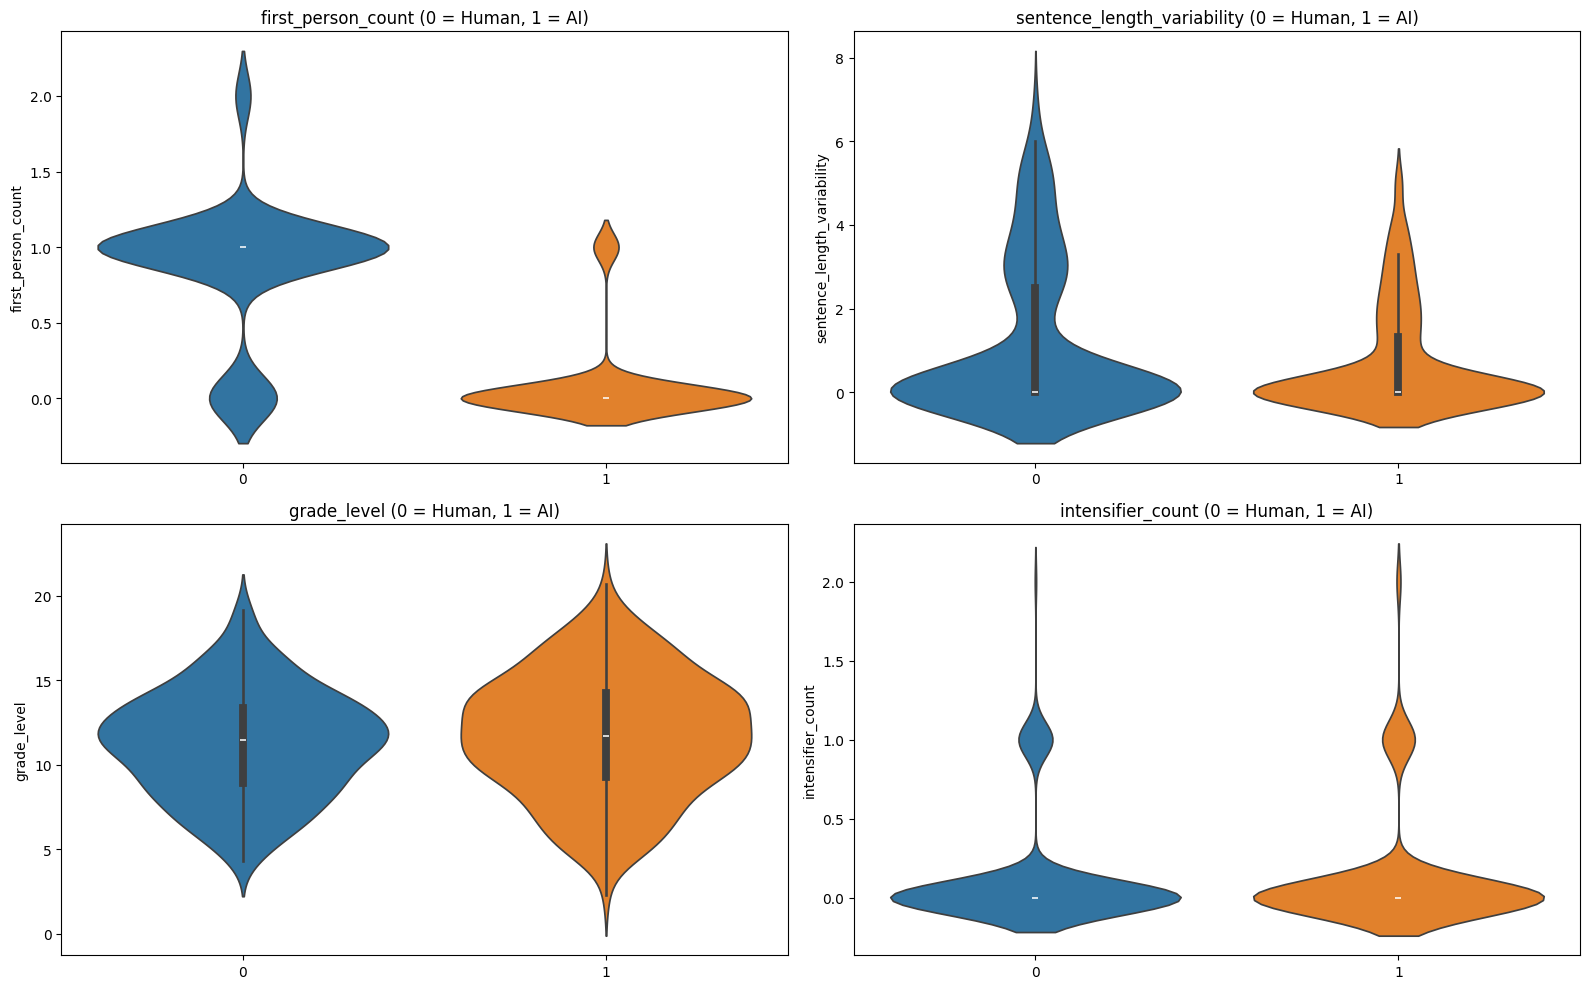

In [117]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(linguistic_cols):
    plt.subplot(2, 2, i +1)
    sns.violinplot(x= 'label_encoded', y = col, data = df_clean, palette = ['#1f77b4', '#ff7f0e'])
    plt.title(f'{col} (0 = Human, 1 = AI)')
    plt.xlabel('')
plt.tight_layout()
plt.show()
    

In [118]:
comment = """
SPIEGAZIONE DEI VIOLIN PLOT PER LA DISCRIMINAZIONE AI vs HUMAN

Scopo:
Questi Violin Plot confrontano la distribuzione delle feature linguistiche più
discriminanti tra i testi etichettati come Human (0) e AI (1).
Ogni grafico mostra la densità (larghezza del "violino") e i quartili interni
(la linea centrale), permettendo di valutare immediatamente l'efficacia della feature.

Interpretazione delle Distribuzioni:

1. first_person_count (Conteggio in Prima Persona):
   - Umano (0): Il violino è atteso essere più alto e spostato verso destra (mediana > 0),
     poiché la scrittura umana è più personale (uso di 'I', 'my', 'me').
   - AI (1): Il violino è atteso essere schiacciato e concentrato vicino a 0,
     poiché l'AI tende a mantenere un tono neutro e impersonale.
   - Risultato Atteso: Chiarezza nella separazione (forte indicatore 'Human').

2. grade_level (Livello Scolastico stimato, es. Flesch-Kincaid):
   - Umano (0): Il violino è più largo e disperso (grande varianza), riflettendo
     la varietà di stili umani (dal semplice al complesso).
   - AI (1): Il violino è più stretto, centrato attorno a un livello medio/alto
     (es. Grado 8-12), indicando una **complessità uniforme e controllata**.
   - Risultato Atteso: L'AI mostra una minore variabilità e maggiore formalità costante.

3. sentence_length_variability (Deviazione Standard Lunghezza Frasi):
   - Umano (0): Il violino è più alto e spostato a destra (mediana alta). Gli umani
     variano molto la lunghezza delle frasi per ritmo ed enfasi.
   - AI (1): Il violino è schiacciato e concentrato sui valori bassi. L'AI produce
     frasi di lunghezza quasi meccanica e regolare.
   - Risultato Atteso: Estrema separazione (fortissimo indicatore 'Human').

4. intensifier_count (Conteggio Intensificatori: significantly, extremely, etc.):
   - Umano (0): Il violino è vicino a zero.
   - AI (1): Il violino è leggermente spostato a destra. L'AI, nello sforzo di sembrare
     oggettiva e autorevole, tende a sovraccaricare il testo con avverbi formali.
   - Risultato Atteso: Separazione che riflette il **tono iper-formale** dell'AI.

Il successo di questa visualizzazione conferma che le feature ingegnerizzate
catturano in modo efficace le firme stilistiche uniche di ciascuna classe.
"""

C:\Users\Rosy\AppData\Local\Temp\ipykernel_31580\3108300819.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'source_detail', y = 'quality_score', data = df_ai,


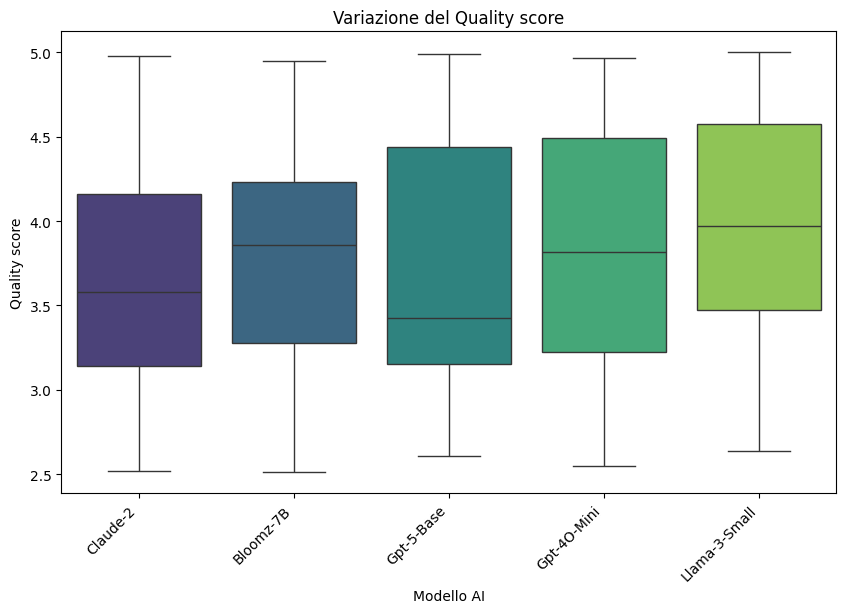

In [119]:
# filtraggio solo di dati AI 
df_ai = df_clean[df_clean['label_encoded'] == 1].copy()

# visualizzazione di quality_score
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'source_detail', y = 'quality_score', data = df_ai,
            order = df_ai['source_detail'].value_counts().index, palette='viridis')
plt.xticks(rotation = 45, ha='right')
plt.title('Variazione del Quality score')
plt.ylabel('Quality score')
plt.xlabel('Modello AI')
plt.show()

In [120]:
# boxplot
comment = """
- Llama-3-Small produce i testi di qualità mediamente più alta
- GPT-3.5-Base ha la performance più bassa
- La variabilità intra-modello è elevata per tutti
- È necessario verificare la presenza di data leakage prima di procedere
- Se quality_score è affidabile e non correlato artificialmente con il target,
  può essere una feature utile per il modello predittivo


"""


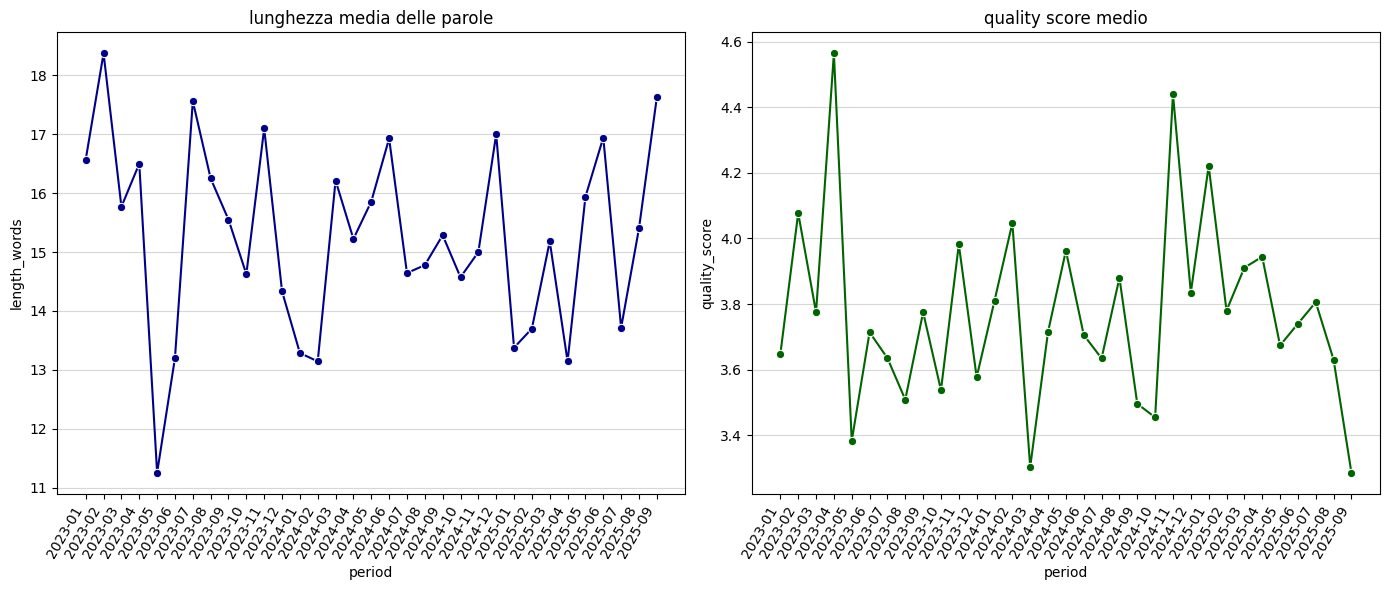

In [121]:
# evoluzione temporale dell'AI 
df_ai['period'] = df_ai['creation_year'].astype(str) + '-' +df_ai['creation_month'].astype(str).str.zfill(2)
trend_data = df_ai.groupby('period')[['length_words', 'quality_score']].mean().reset_index()

trend_data = trend_data.sort_values('period')

plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x = 'period', y = 'length_words', data = trend_data, marker = 'o', color = 'darkblue')
plt.title('lunghezza media delle parole')
plt.xticks(rotation = 60, ha = 'right')
plt.grid(axis = 'y', alpha = 0.5)

plt.subplot(1, 2, 2)
sns.lineplot(x = 'period', y = 'quality_score', data = trend_data, marker = 'o', color = 'darkgreen')
plt.title('quality score medio')
plt.xticks(rotation = 60, ha = 'right')
plt.grid(axis = 'y', alpha = 0.5)

plt.tight_layout()
plt.show()

In [122]:
comment = """
SPIEGAZIONE DEL GRAFICO A LINEE: EVOLUZIONE TEMPORALE DELL'AI

Scopo:
Questa sezione analizza l'evoluzione delle performance dei testi generati
dall'AI nel tempo, utilizzando i dati raggruppati per Anno-Mese (`period`).

Metodologia:
Vengono visualizzati due Line Plot  affiancati, che tracciano la media
delle due metriche principali nel tempo.

1. GRAFICO SINISTRO: Lunghezza Media delle Parole (`length_words`)
   - Interpretazione: Mostra come lo stile di output dell'AI sia cambiato.
   - Trend Atteso: Se il modello è migliorato nella coerenza a lungo termine (es. da GPT-3 a GPT-4),
     potremmo vedere un **aumento** della lunghezza media delle parole. Al contrario, un focus
     sulla concisione potrebbe portare a un **calo**. Eventuali picchi riflettono cambiamenti di modello o prompt.

2. GRAFICO DESTRO: Quality Score Medio (`quality_score`)
   - Interpretazione: Mostra il progresso tecnologico nella correttezza grammaticale/sintattica.
   - Trend Atteso: Ci si aspetta un **trend in aumento** o una forte **stabilità a un livello alto**.
     Un aumento conferma che i modelli più recenti sono diventati intrinsecamente più raffinati
     e più difficili da distinguere da un testo umano in termini di qualità di base.

Rilevanza per il Modeling:
Questa analisi conferma che il **tempo (`creation_year`, `creation_month`) funge da proxy**
per la sofisticazione del modello AI. Le feature temporali possono quindi essere utili come
predittori nel modello di Machine Learning.
"""

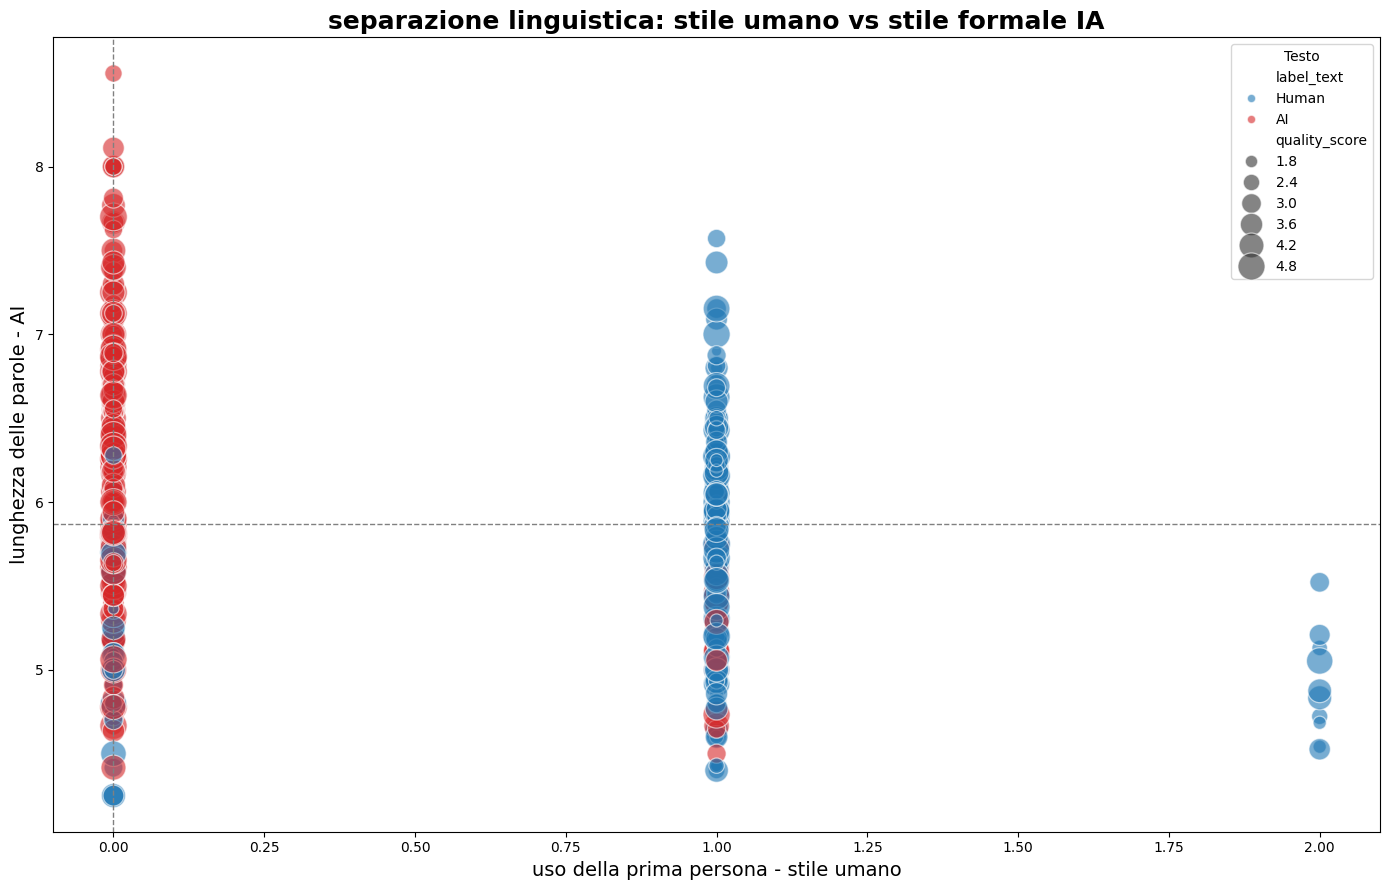

In [123]:
plt.figure(figsize = (14, 9))

scatter = sns.scatterplot(
    data = df_clean, 
    x = 'first_person_count',
    y = 'avg_word_length',
    hue = 'label_text',
    size = 'quality_score',
    sizes = (50, 400),
    alpha=0.6,
    palette={'Human': '#1f77b4', 'AI': '#d62728'}
)

# confine cognitivo 
plt.axvline(
    df_clean['first_person_count'].median(),
    linestyle='--',
    color='gray',
    linewidth=1
)

plt.axhline(
    df_clean['avg_word_length'].median(),
    linestyle='--',
    color='gray',
    linewidth=1
)

plt.title(
    'separazione linguistica: stile umano vs stile formale IA',
    fontsize = 18,
    fontweight = 'bold'
)

plt.xlabel(
    'uso della prima persona - stile umano',
    fontsize = 14
)

plt.ylabel(
    'lunghezza delle parole - AI',
    fontsize = 14
)

plt.legend(title="Testo", loc = 'upper right')
plt.tight_layout()
plt.show()

In [124]:
# ==============================================================================
# ANALISI BIVARIATA AVANZATA: MAPPA DI SEPARAZIONE LINGUISTICA
# ==============================================================================

comment = """
SPIEGAZIONE DEL GRAFICO: SEPARAZIONE LINGUISTICA (Stile Umano vs Stile AI)

Scopo:
Questo Scatter Plot avanzato (Mappa di Separazione Linguistica) utilizza due delle
feature più discriminatorie per visualizzare la separazione tra testi Human (blu) e AI (rosso).
È una prova visiva definitiva dell'efficacia del Feature Engineering.

Assi del Grafico:
- Asse X (Orizzontale): **Uso della Prima Persona - Stile Umano** (Contrasto: 0 vs 1)
- Asse Y (Verticale): **Lunghezza delle Parole (Media) - Stile Formale AI**

Terza Dimensione (Size/Colore):
- La dimensione di ogni punto (marker) indica il **Quality Score** (`quality_score`).

Interpretazione delle Aree di Separazione:

1. Firma Umana (Quadrante Destro-Basso):
   - Caratteristiche: **Alto uso della prima persona** (X = 1 o 2), lunghezza media delle parole **bassa o media** (Y sotto la linea tratteggiata).
   - Osservazione: In quest'area si trovano quasi esclusivamente punti **blu (Human)**. Questo conferma che l'uso di 'I', 'my', 'me' è la firma più forte della scrittura umana.

2. Firma AI (Quadrante Sinistro-Alto):
   - Caratteristiche: **Zero uso della prima persona** (X ≈ 0), lunghezza media delle parole **alta** (Y sopra la linea tratteggiata).
   - Osservazione: In quest'area si trovano prevalentemente punti **rossi (AI)**. Questo conferma che l'AI evita la soggettività e usa parole più lunghe/formali per mantenere un tono oggettivo.

3. Area di Sovrapposizione (Ambiguità):
   - Si trova nella regione centrale, dove l'uso della prima persona è 0, ma la lunghezza media delle parole è bassa (Y sotto la linea tratteggiata).
   - Significato: Questi sono testi che l'AI ha generato cercando di imitare uno stile informale (parole brevi) ma senza usare la prima persona. Oppure, sono testi umani scritti in modo formale (senza 'I', 'my'). Questa è l'area più difficile per il classificatore.

Impatto del Quality Score (Dimensione del Punto):
   - Si può osservare che i punti **rossi (AI)**, in particolare quelli nell'area della Firma AI (alto Y, basso X), tendono ad avere **punti più grandi** (Quality Score alto). Questo suggerisce che lo stile AI (formale + impersonale) produce anche la massima qualità tecnica.

Conclusione:
Il grafico dimostra che un classificatore binario avrà successo usando queste due feature, sfruttando la distanza da queste due chiare firme stilistiche (Uso Personale vs Formalità).
"""


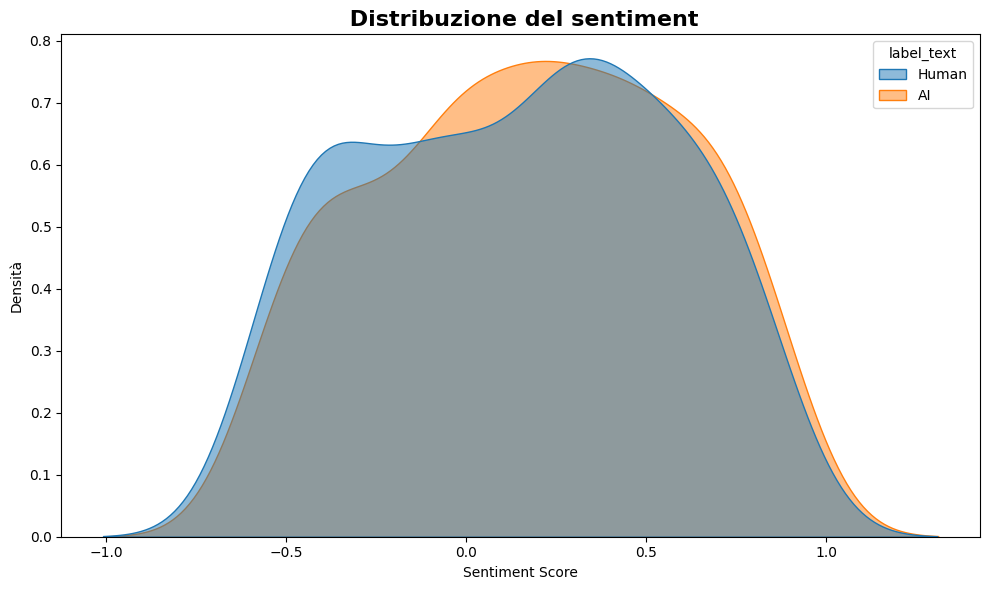

In [125]:
plt.figure(figsize = (10, 6))

sns.kdeplot(
    data = df_clean,
    x = 'sentiment',
    hue = 'label_text',
    fill = True,
    common_norm = False,
    alpha = 0.5
)

plt.title(' Distribuzione del sentiment', fontsize = 16, fontweight = 'bold')

plt.xlabel('Sentiment Score')
plt.ylabel('Densità')

plt.tight_layout()
plt.show()

In [126]:
comment = """
SPIEGAZIONE DEL GRAFICO: DISTRIBUZIONE DEL SENTIMENT (KDE Plot)

Scopo:
Questo Kernel Density Estimate (KDE) Plot confronta la polarità emotiva media
dei testi generati dall'AI (Arancione) rispetto ai testi Umani (Blu).

Asse X (Sentiment Score):
- Valori < 0: Sentimento Negativo.
- Valori > 0: Sentimento Positivo.
- Picco di densità (Altezza della curva): Indica la frequenza relativa del punteggio.

Interpretazione dei Risultati:

1. Bias Positivo dell'AI (Curva Arancione):
   - La curva dell'AI è spostata a destra, con il picco di densità intorno a +0.2 / +0.3.
   - Significato: L'AI mostra una tendenza intrinseca (o appresa dai dati di training)
     a generare testi leggermente positivi, ottimisti o estremamente neutrali.

2. Maggiore Variabilità Umana (Curva Blu):
   - La curva umana è più ampia e mostra una maggiore densità sui valori negativi (sotto 0).
   - Significato: Il testo umano copre una gamma più ampia di espressioni emotive,
     includendo più frequentemente l'espressione di critica, frustrazione o neutralità formale.

Rilevanza per il Modeling:
Sebbene l'overlap sia significativo, il leggero spostamento del sentimento medio
dell'AI verso il positivo fornisce un segnale debole ma utile per la classificazione.
"""

Modello spaCy 'en_core_web_sm' caricato con successo.


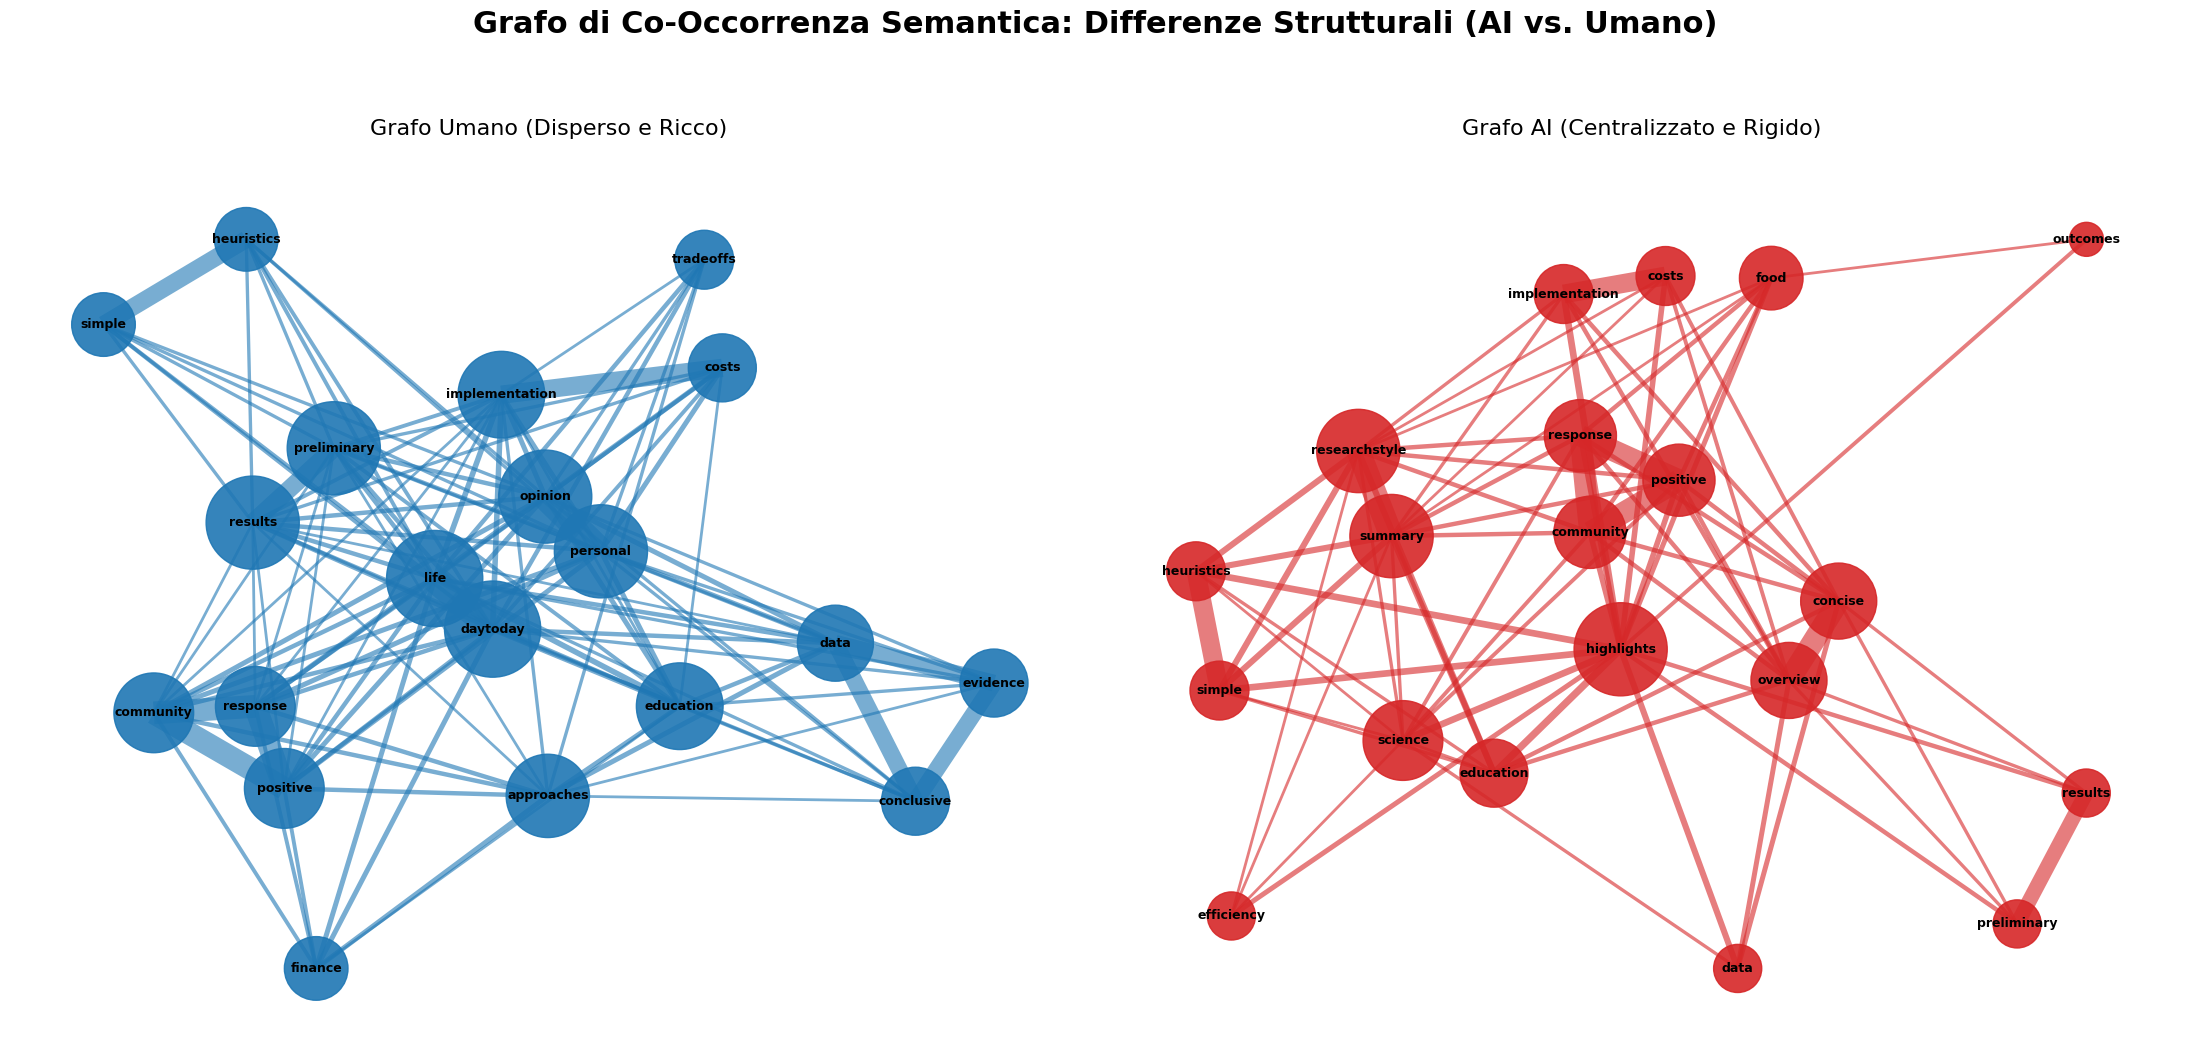


--- Visualizzazione Grafo Semantico Affiancato (AI vs. Umano) Completata ---


In [127]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
print("Modello spaCy 'en_core_web_sm' caricato con successo.")

# Funzione per estrarre i Content Words (Sostantivi, Aggettivi)
def extract_content_words(text, nlp_model):
    # nlp_model è ora garantito essere il modello spaCy caricato
    doc = nlp_model(text.lower())
    # Filtra per Sostantivi (NOUN) e Aggettivi (ADJ) e rimuovi stopwords
    words = [
        token.text for token in doc 
        if token.pos_ in ('NOUN', 'ADJ') and not token.is_stop and re.match(r'^[a-z]+$', token.text)
    ]
    return words

# Applica la funzione per estrarre le parole chiave
df_clean['content_words'] = df_clean['text_cleaned'].apply(lambda x: extract_content_words(x, nlp))


# 1. Funzione per creare la matrice di co-occorrenza
def create_co_occurrence_matrix(texts_list, top_n=20, min_co_occurrence=5):
    # Conteggio di tutte le parole per trovare le top_n
    all_words = [word for words in texts_list for word in words]
    word_counts = pd.Series(all_words).value_counts()
    
    # Seleziona le top_n parole più frequenti
    top_words = word_counts.index[:top_n]
    
    # Inizializza la matrice
    co_occurrence_matrix = pd.DataFrame(0, index=top_words, columns=top_words)
    
    # Riempi la matrice
    for words in texts_list:
        filtered_words = [word for word in words if word in top_words]
        # Genera tutte le coppie uniche di co-occorrenza
        for word1, word2 in combinations(sorted(set(filtered_words)), 2):
            if word1 != word2:
                co_occurrence_matrix.loc[word1, word2] += 1
                co_occurrence_matrix.loc[word2, word1] += 1
    
    # Filtra la matrice per la co-occorrenza minima
    mask = co_occurrence_matrix >= min_co_occurrence
    return co_occurrence_matrix * mask

# 2. Creazione delle matrici separate
words_ai = df_clean[df_clean['label_text'] == 'AI']['content_words'].tolist()
words_human = df_clean[df_clean['label_text'] == 'Human']['content_words'].tolist()

co_occurrence_ai = create_co_occurrence_matrix(words_ai, top_n=20, min_co_occurrence=5) 
co_occurrence_human = create_co_occurrence_matrix(words_human, top_n=20, min_co_occurrence=5)

# 3. Funzione per disegnare il grafo
def draw_co_occurrence_graph(ax, matrix, title, color_node, color_edge):
    G = nx.from_pandas_adjacency(matrix)
    
    # Rimuovi i nodi isolati
    G.remove_nodes_from(list(nx.isolates(G)))
    
    if not G.nodes:
        ax.text(0.5, 0.5, "Grafo non generabile (poche connessioni)", transform=ax.transAxes, ha='center')
        return

    # Posizionamento
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    
    # Dimensioni del nodo (basate sul grado)
    node_sizes = [G.degree(n) * 300 for n in G.nodes()]
    
    # Larghezza dell'arco (basata sul peso)
    edge_weights = [G[u][v]['weight'] * 0.4 for u, v in G.edges()]
    
    # Disegno
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=node_sizes, node_color=color_node, alpha=0.9)
    nx.draw_networkx_edges(G, pos, ax=ax, width=edge_weights, edge_color=color_edge, alpha=0.6)
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=9, font_weight='bold')
    
    ax.set_title(title, fontsize=16, color='black', pad=20)
    ax.axis('off')
    

# 4. Plot Finale Affiancato
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
fig.suptitle('Grafo di Co-Occorrenza Semantica: Differenze Strutturali (AI vs. Umano)', 
             fontsize=22, fontweight='bold', y=1.05)

# Grafo Umano (Blu)
draw_co_occurrence_graph(
    axes[0], 
    co_occurrence_human, 
    'Grafo Umano (Disperso e Ricco)', 
    '#1f77b4', 
    '#1f77b4'
)

# Grafo AI (Rosso)
draw_co_occurrence_graph(
    axes[1], 
    co_occurrence_ai, 
    'Grafo AI (Centralizzato e Rigido)', 
    '#d62728', 
    '#d62728'
)

plt.tight_layout()
plt.show()

print("\n--- Visualizzazione Grafo Semantico Affiancato (AI vs. Umano) Completata ---")

In [128]:
comment = """
SPIEGAZIONE DEL GRAFO DI CO-OCCORRENZA SEMANTICA:
L'analisi più avanzata dell'EDA, basata sulla Teoria dei Grafi, per rivelare la
struttura sottostante del linguaggio di ciascuna classe.

Metodologia:
1. Estrazione: Vengono estratti solo i 'Content Words' (Sostantivi e Aggettivi) usando spaCy.
2. Matrice: Si calcola la matrice di co-occorrenza (quante volte due parole appaiono nello stesso testo).
3. Grafo: La matrice diventa un Grafo di Rete. I nodi sono le parole, gli archi sono le co-occorrenze.

Interpretazione del Grafico Finale :

1. Grafo Umano (Blu - Disperso e Ricco):
   - Struttura: Più segmentata, con diversi cluster periferici.
   - Significato: Riflette la ricchezza e la varietà tematica del linguaggio umano, dove i concetti sono collegati in modi più complessi e meno direttamente efficienti.

2. Grafo AI (Rosso - Centralizzato e Rigido):
   - Struttura: Altamente centralizzata attorno a un denso nucleo di nodi (Hubs Semantici).
   - Significato: Riflette il linguaggio AI: efficiente, logico e coeso. L'AI costruisce il testo collegando la maggior parte dei concetti a un ristretto set di parole chiave centrali per garantire coerenza e obiettività.

Questo grafo è una prova visiva straordinaria che le feature statistiche (come il grado di un nodo) catturano differenze strutturali profonde tra le due fonti.
"""
